In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
from keras.layers import Input, Dense, Activation
from keras.models import Model

In [3]:
ds = pd.read_csv('/Users/ayush/Downloads/all/train.csv')

In [5]:
data = ds.values[:8000, 1:]
print data.shape

(8000, 784)


In [11]:
inp = Input(shape=(784,))

h1 = Dense(100)
a1 = Activation('sigmoid')
## Vector of length 100
h2 = Dense(784)
a2 = Activation('sigmoid')
## Vector of length 784

out = a2(h2(a1(h1(inp))))

model = Model(inputs=[inp], outputs=[out])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 784)               79184     
_________________________________________________________________
activation_6 (Activation)    (None, 784)               0         
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='MSE', optimizer='adam')

In [17]:
split = int(0.8*data.shape[0])
X_train = data[:split]/255.0
Y_train = data[:split]/255.0

X_test = data[split:]/255.0
Y_test = data[split:]/255.0

print X_train.shape, Y_train.shape
print X_test.shape, Y_test.shape

(6400, 784) (6400, 784)
(1600, 784) (1600, 784)


In [18]:
model.fit(X_train, Y_train, batch_size=8, epochs=60, validation_data=[X_test, Y_test])

Train on 6400 samples, validate on 1600 samples
Epoch 1/60
6400/6400 [==============================] - 1s 206us/step - loss: 0.0024 - val_loss: 0.0036
Epoch 2/60
6400/6400 [==============================] - 1s 216us/step - loss: 0.0024 - val_loss: 0.0036
Epoch 3/60
6400/6400 [==============================] - 1s 204us/step - loss: 0.0024 - val_loss: 0.0036
Epoch 4/60
6400/6400 [==============================] - 1s 207us/step - loss: 0.0024 - val_loss: 0.0036
Epoch 5/60
6400/6400 [==============================] - 1s 202us/step - loss: 0.0024 - val_loss: 0.0035
Epoch 6/60
6400/6400 [==============================] - 1s 205us/step - loss: 0.0024 - val_loss: 0.0035
Epoch 7/60
6400/6400 [==============================] - 1s 204us/step - loss: 0.0024 - val_loss: 0.0035
Epoch 8/60
6400/6400 [==============================] - 1s 209us/step - loss: 0.0023 - val_loss: 0.0036
Epoch 9/60
6400/6400 [==============================] - 1s 210us/step - loss: 0.0023 - val_loss: 0.0035
Epoch 10/60
6400

In [19]:
## Encoder Model
inp = Input(shape=(784,))
enc_out = a1(h1(inp))
encoder = Model(inputs=[inp], outputs=[enc_out])

encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
Total params: 78,500
Trainable params: 78,500
Non-trainable params: 0
_________________________________________________________________


In [20]:
## Decoder Model
dec_inp = Input(shape=(100,))
dec_out = a2(h2(dec_inp))

decoder = Model(inputs=[dec_inp], outputs=[dec_out])

decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 784)               79184     
_________________________________________________________________
activation_6 (Activation)    (None, 784)               0         
Total params: 79,184
Trainable params: 79,184
Non-trainable params: 0
_________________________________________________________________


In [21]:
img_batch = data[7000:8000]/255.0
print img_batch.shape
ex = encoder.predict(img_batch)
print ex.shape

(1000, 784)
(1000, 100)


In [22]:
dx = decoder.predict(ex)
print dx.shape

(1000, 784)


7681


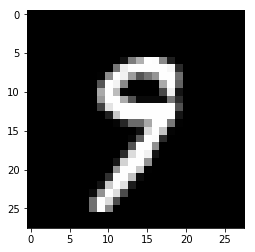

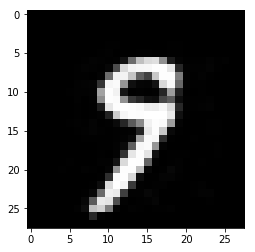

In [39]:
n = np.random.randint(7005, 7999)
print n
plt.imshow(data[n].reshape((28, 28)), cmap='gray')
plt.show()

plt.imshow(dx[n-7000].reshape((28, 28)), cmap='gray')
plt.show()